# Tutorial

## Sample

In [39]:
import numpy as np
from matplotlib import pyplot as plt

In [40]:
def function(x):
    return x**2 + np.sin(np.pi*x)

In [41]:
N = int(1e+4)
W, H = 1, 1.4

In [42]:
X = np.random.random(N)
Y = H*np.random.random(N)

In [43]:
F = function(X)
in_out = Y < F
A = H * W * np.sum(in_out) / N

In [44]:
print(f'A= {A}')

A= 0.9833599999999999


## Ploting

In [45]:
color = list(map(lambda x: 'dodgerblue' if x else 'red', in_out))

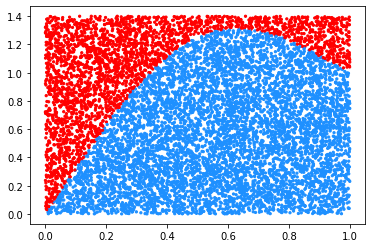

In [46]:
plt.scatter(X, Y, color=color, s=5, label=f'A = {np.round(A, 4)}')

## Stock price montcarlo simulation

In [47]:
# 가상의 일일 주식 종가로 목록 선언
history_prices = [180,192,193,195,191,199,198,200,199,203,205,207,205,208,201,203,204,201,205,206,207]
print(history_prices)

[180, 192, 193, 195, 191, 199, 198, 200, 199, 203, 205, 207, 205, 208, 201, 203, 204, 201, 205, 206, 207]


In [48]:
# 계산을위한 가져 오기 통계 예 : 가격 이력의 표준 편차
import statistics as stat
# 플로팅을 위해 pyplot 가져 오기
import matplotlib.pyplot as plt
# 난수 생성을 위해 임의 가져 오기
import random as rnd


In [49]:
relative_prices = []
for i in range(0,len(history_prices)):
    if i == 0:
        pass
    else:
        relative_prices.append((history_prices[i]-history_prices[i-1])/(history_prices[i-1])) 

In [50]:
std_prices = stat.stdev(relative_prices)
print(std_prices)

0.021375589655016836


In [51]:
history_prices[-1]

207

In [52]:
# 100 일 동안 무작위 가격 변동 모델링
# -- 계산 수행, 기능 정의
def randomWalk(stdev, pastPrices):
    days = [i for i in range(1,101)]
    prices = []
    price = pastPrices[-1]
    for i in range(1,101):
        price = price + price*rnd.normalvariate(0,stdev)
        prices.append(price)
    return([days,prices])

Text(0, 0.5, 'stock price')

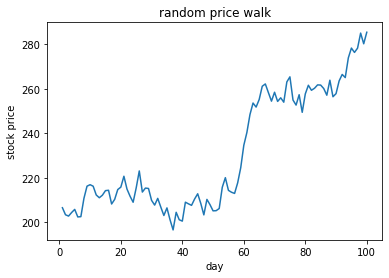

In [53]:
# -- 계산 수행, 기능 사용
prices = randomWalk(std_prices,history_prices)
# -- 임의의 걷기를 선 플롯으로 시각화
plt.plot(prices[0],prices[1])
plt.title("random price walk")
plt.xlabel("day")
plt.ylabel("stock price")

Text(0, 0.5, 'stock price')

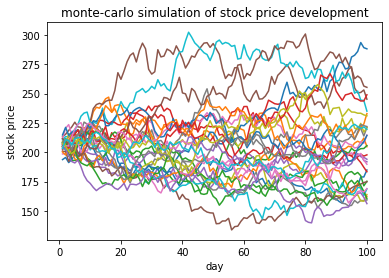

In [54]:
for i in range(0,30):
    prices = randomWalk(std_prices,history_prices)
    plt.plot(prices[0],prices[1])
plt.title("monte-carlo simulation of stock price development")
plt.xlabel("day")
plt.ylabel("stock price")

# JEPX

In [55]:
import pandas as pd

In [56]:
jepx_spot_2022 = pd.read_csv('http://www.jepx.org/market/excel/spot_2022.csv', encoding='shift_jis')

In [57]:
jepx_spot_2022

,年月日,時刻コード,売り入札量(kWh),買い入札量(kWh),約定総量(kWh),システムプライス(円/kWh),エリアプライス北海道(円/kWh),エリアプライス東北(円/kWh),エリアプライス東京(円/kWh),エリアプライス中部(円/kWh),...,FIP参照価格（卸電力取引市場分）全国値(円/kWh),FIP参照価格（卸電力取引市場分）北海道(円/kWh),FIP参照価格（卸電力取引市場分）東北(円/kWh),FIP参照価格（卸電力取引市場分）東京(円/kWh),FIP参照価格（卸電力取引市場分）中部(円/kWh),FIP参照価格（卸電力取引市場分）北陸(円/kWh),FIP参照価格（卸電力取引市場分）関西(円/kWh),FIP参照価格（卸電力取引市場分）中国(円/kWh),FIP参照価格（卸電力取引市場分）四国(円/kWh),FIP参照価格（卸電力取引市場分）九州(円/kWh)
0,2022/04/01,1,17007100,16995100,15959150,11.97,10.39,10.39,12.12,12.12,...,12.08,10.41,10.41,12.14,12.13,12.13,12.57,12.15,12.12,12.22
1,2022/04/01,2,17252550,17306150,15896600,14.47,14.47,14.47,14.47,14.47,...,14.48,14.51,14.47,14.48,14.49,14.47,14.47,14.47,14.47,14.47
2,2022/04/01,3,17496550,17531950,15988650,15.00,24.32,24.32,24.32,14.49,...,15.03,24.25,24.32,24.32,14.49,14.49,14.49,14.50,14.49,14.49
3,2022/04/01,4,17994700,17695250,16003200,16.55,16.55,16.55,16.55,16.55,...,16.55,16.56,16.55,16.55,16.56,16.55,16.55,16.56,16.55,16.55
4,2022/04/01,5,18144250,17845100,16073050,17.30,24.32,24.32,24.32,16.55,...,17.32,24.32,24.32,24.32,16.55,16.54,16.54,16.55,16.55,16.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10603,2022/11/07,44,19427450,20357450,16245500,28.04,28.94,28.94,28.94,27.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10604,2022/11/07,45,19012450,19937250,15812500,27.95,30.47,30.47,30.47,30.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10605,2022/11/07,46,18791600,19681500,15762900,26.70,29.17,29.17,29.17,29.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10606,2022/11/07,47,18529500,19128350,15667450,25.68,28.43,28.43,28.43,28.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
jepx_spot_2022.columns

Index(['年月日', '時刻コード', '売り入札量(kWh)', '買い入札量(kWh)', '約定総量(kWh)',
       'システムプライス(円/kWh)', 'エリアプライス北海道(円/kWh)', 'エリアプライス東北(円/kWh)',
       'エリアプライス東京(円/kWh)', 'エリアプライス中部(円/kWh)', 'エリアプライス北陸(円/kWh)',
       'エリアプライス関西(円/kWh)', 'エリアプライス中国(円/kWh)', 'エリアプライス四国(円/kWh)',
       'エリアプライス九州(円/kWh)', 'Unnamed: 15', 'スポット・時間前平均価格(円/kWh)',
       'α上限値×スポット・時間前平均価格(円/kWh)', 'α下限値×スポット・時間前平均価格(円/kWh)',
       'α速報値×スポット・時間前平均価格(円/kWh)', 'α確報値×スポット・時間前平均価格(円/kWh)', 'Unnamed: 21',
       '回避可能原価全国値(円/kWh)', '回避可能原価北海道(円/kWh)', '回避可能原価東北(円/kWh)',
       '回避可能原価東京(円/kWh)', '回避可能原価中部(円/kWh)', '回避可能原価北陸(円/kWh)',
       '回避可能原価関西(円/kWh)', '回避可能原価中国(円/kWh)', '回避可能原価四国(円/kWh)',
       '回避可能原価九州(円/kWh)', 'Unnamed: 32', '売りブロック入札総量(kWh)', '売りブロック約定総量(kWh)',
       '買いブロック入札総量(kWh)', '買いブロック約定総量(kWh)', 'Unnamed: 37',
       'FIP参照価格（卸電力取引市場分）全国値(円/kWh)', 'FIP参照価格（卸電力取引市場分）北海道(円/kWh)',
       'FIP参照価格（卸電力取引市場分）東北(円/kWh)', 'FIP参照価格（卸電力取引市場分）東京(円/kWh)',
       'FIP参照価格（卸電力取引市場分）中部(円/kWh)', 'FIP参照価格（卸電力取引市場分）北陸(円/

In [59]:
jepx_spot_2022['時刻コード'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [60]:
jepx_spot_2022['Unnamed: 15']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10603   NaN
10604   NaN
10605   NaN
10606   NaN
10607   NaN
Name: Unnamed: 15, Length: 10608, dtype: float64

In [61]:
jepx_spot_2022[['年月日', '時刻コード', 'エリアプライス東京(円/kWh)']]

,年月日,時刻コード,エリアプライス東京(円/kWh)
0,2022/04/01,1,12.12
1,2022/04/01,2,14.47
2,2022/04/01,3,24.32
3,2022/04/01,4,16.55
4,2022/04/01,5,24.32
...,...,...,...
10603,2022/11/07,44,28.94
10604,2022/11/07,45,30.47
10605,2022/11/07,46,29.17
10606,2022/11/07,47,28.43


In [62]:
df = jepx_spot_2022[['年月日', '時刻コード', 'エリアプライス東京(円/kWh)']]

In [63]:
df.pivot(index='年月日', columns='時刻コード')['エリアプライス東京(円/kWh)'].describe()

時刻コード,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,22.480633,21.615973,21.178914,20.764480,20.670860,20.529140,20.900995,21.103937,21.223258,21.638100,...,38.454706,35.647738,33.688643,31.536244,29.588914,27.152986,28.287376,25.714027,23.630995,20.450407
std,6.103239,5.239530,5.145275,4.883209,4.622813,4.312406,4.514238,4.637392,4.599257,4.802757,...,15.705218,12.746113,11.249918,9.816729,9.054022,7.946580,8.150783,7.630552,7.072659,6.699941
min,1.000000,1.100000,1.100000,1.000000,1.000000,0.300000,0.300000,1.000000,3.000000,3.000000,...,20.000000,20.000000,19.240000,19.010000,15.750000,14.990000,14.990000,10.720000,10.760000,4.650000
25%,18.940000,18.150000,18.000000,17.510000,17.430000,17.650000,17.670000,17.770000,17.700000,17.830000,...,26.920000,26.400000,25.580000,25.030000,23.430000,21.980000,22.900000,20.200000,19.490000,17.210000
50%,21.020000,20.110000,20.040000,19.780000,19.750000,19.570000,19.840000,20.000000,20.000000,20.000000,...,35.160000,32.100000,30.180000,28.970000,27.770000,25.170000,26.810000,23.430000,21.510000,19.480000
75%,25.710000,24.600000,23.890000,23.340000,23.340000,23.130000,23.600000,23.930000,24.100000,25.000000,...,44.680000,40.590000,37.150000,35.000000,33.620000,29.990000,32.640000,29.500000,26.840000,22.970000
max,43.970000,42.890000,43.000000,42.780000,33.630000,33.440000,42.780000,41.000000,40.000000,41.880000,...,138.000000,100.000000,84.980000,80.000000,64.080000,56.690000,59.190000,56.300000,55.710000,49.400000


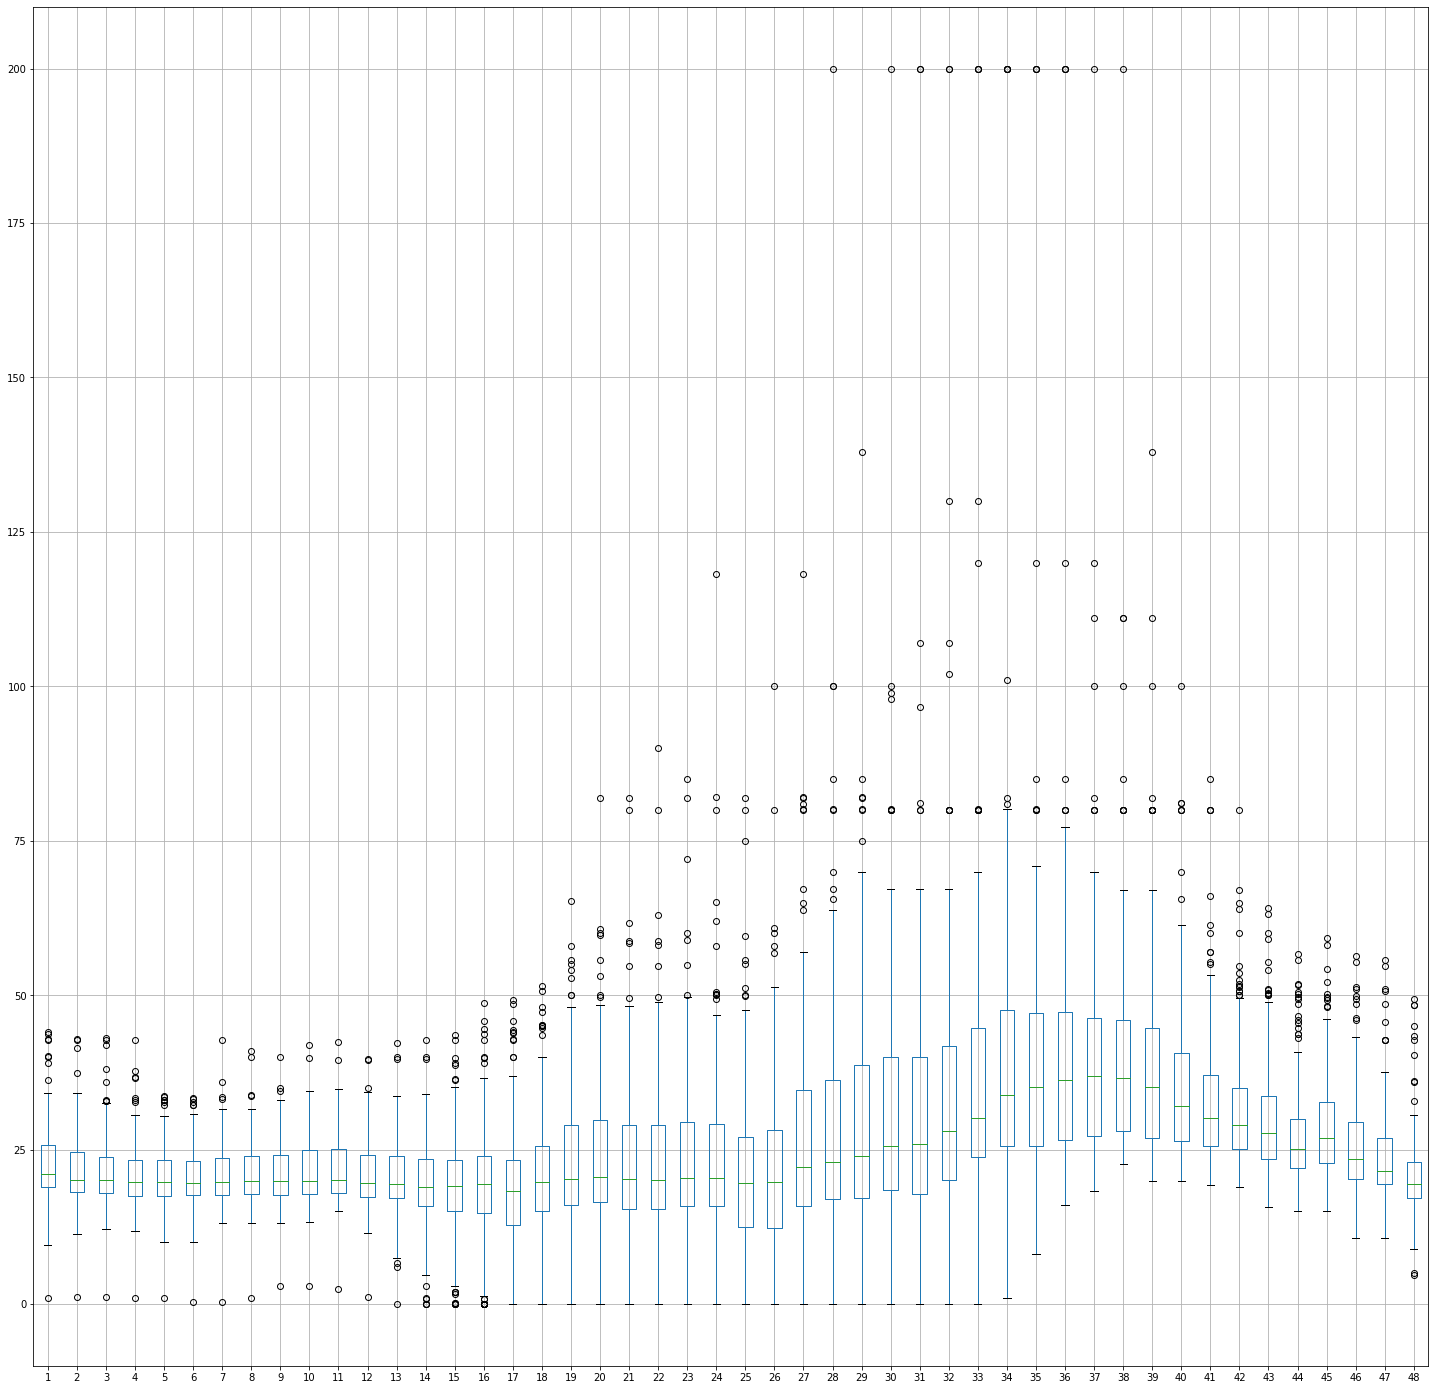

In [64]:
df.pivot(index='年月日', columns='時刻コード')['エリアプライス東京(円/kWh)'].boxplot(figsize=(25,25))

https://allendowney.github.io/ElementsOfDataScience/12_bootstrap.html

In [65]:
df_simulationParam = df.pivot(index='年月日', columns='時刻コード')['エリアプライス東京(円/kWh)'].describe().loc[['mean', 'std']]

In [66]:
df_simulationParam

時刻コード,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
mean,22.480633,21.615973,21.178914,20.764480,20.670860,20.529140,20.900995,21.103937,21.223258,21.638100,...,38.454706,35.647738,33.688643,31.536244,29.588914,27.152986,28.287376,25.714027,23.630995,20.450407
std,6.103239,5.239530,5.145275,4.883209,4.622813,4.312406,4.514238,4.637392,4.599257,4.802757,...,15.705218,12.746113,11.249918,9.816729,9.054022,7.946580,8.150783,7.630552,7.072659,6.699941


In [67]:
df_simulationResult = pd.DataFrame(columns=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [68]:
df_simulationResult

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48


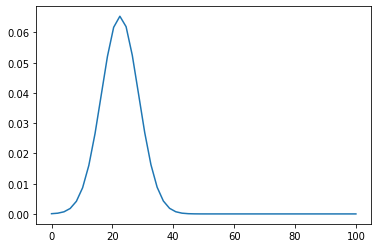

In [69]:
from scipy.stats import norm

fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 100)

ax.plot(x, norm(df_simulationParam[1].loc['mean'], df_simulationParam[1].loc['std']).pdf(x))

In [70]:
norm(df_simulationParam[1].loc['mean'], df_simulationParam[1].loc['std']).rvs()

27.997680365389144

In [72]:
JPEXTimeCodeFrom1To48 = list(df_simulationParam.columns)

simulationResult = []
for n in range(1000):
    simulationRow = {}
    for i in JPEXTimeCodeFrom1To48:
        simulationRow[i] = norm(df_simulationParam[i].loc['mean'], df_simulationParam[i].loc['std']).rvs()
    simulationResult.append(simulationRow)
    if n % 100 == 0:
        print(f'Simulation complete: {n} th')

Simulation complete: 0 th
Simulation complete: 100 th
Simulation complete: 200 th
Simulation complete: 300 th
Simulation complete: 400 th
Simulation complete: 500 th
Simulation complete: 600 th
Simulation complete: 700 th
Simulation complete: 800 th
Simulation complete: 900 th


In [73]:
df_simulationResult.append(simulationResult, ignore_index=True).describe()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.445130,21.459253,21.099348,20.825908,20.654363,20.753925,20.850855,21.151252,21.137350,21.501545,...,38.954879,35.919524,33.103980,31.276413,29.827878,26.804396,28.063157,25.427683,23.974473,20.498925
std,6.117662,5.346971,5.309503,5.034856,4.693539,4.329939,4.470466,4.717307,4.628458,4.747961,...,15.358647,12.463276,11.049487,9.964572,9.094877,7.890235,8.101383,7.520498,6.910200,6.709841
min,3.224110,5.448203,5.254986,3.130681,6.007678,5.774549,7.778481,7.969214,4.637052,6.117923,...,-11.524681,-15.477774,-7.060302,-4.186475,0.572216,3.252592,5.417082,1.617072,0.621626,-0.031250
25%,18.248051,17.888559,17.340475,17.463868,17.562741,17.879493,17.893243,17.997180,18.054409,18.317716,...,29.326703,27.214990,25.597988,24.737312,23.296675,21.433364,22.351326,20.601129,19.285633,16.051721
50%,22.692263,21.253368,21.066083,20.828108,20.607207,20.816515,20.603594,21.042490,21.141807,21.677428,...,39.567247,36.108190,32.974977,31.395086,30.069081,26.910034,27.869287,25.376518,23.953174,20.439211
75%,26.727477,25.053120,24.781000,24.222519,23.705503,23.693572,23.766542,24.272965,24.323279,24.879298,...,49.019998,44.455687,40.330093,38.086255,36.092670,32.057490,33.769590,30.452948,28.696423,24.785745
max,39.269357,39.215735,38.358513,37.999187,37.512184,33.377497,34.500994,35.608780,35.382409,37.159967,...,95.367980,74.886116,64.783264,61.912712,58.704717,59.240206,52.113610,51.154319,44.455072,45.240723


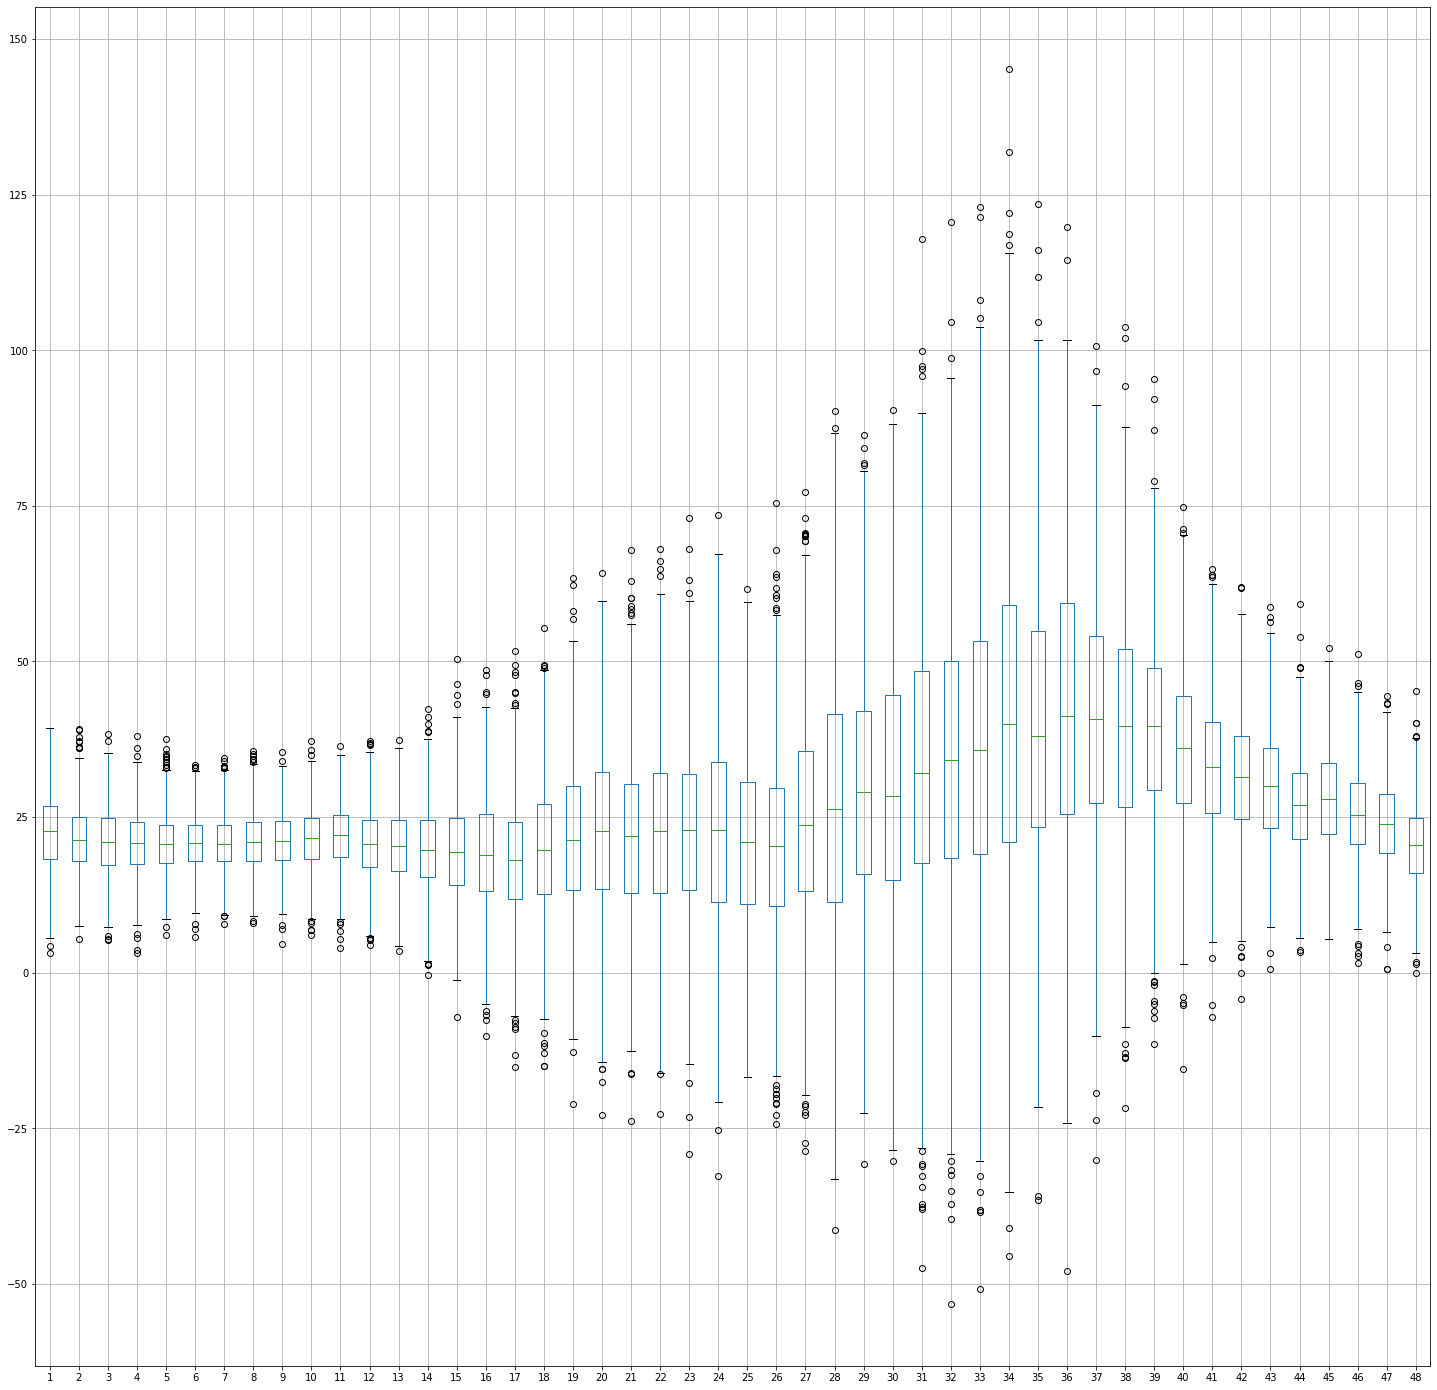

In [74]:
df_simulationResult.append(simulationResult, ignore_index=True).boxplot(figsize=(25,25))

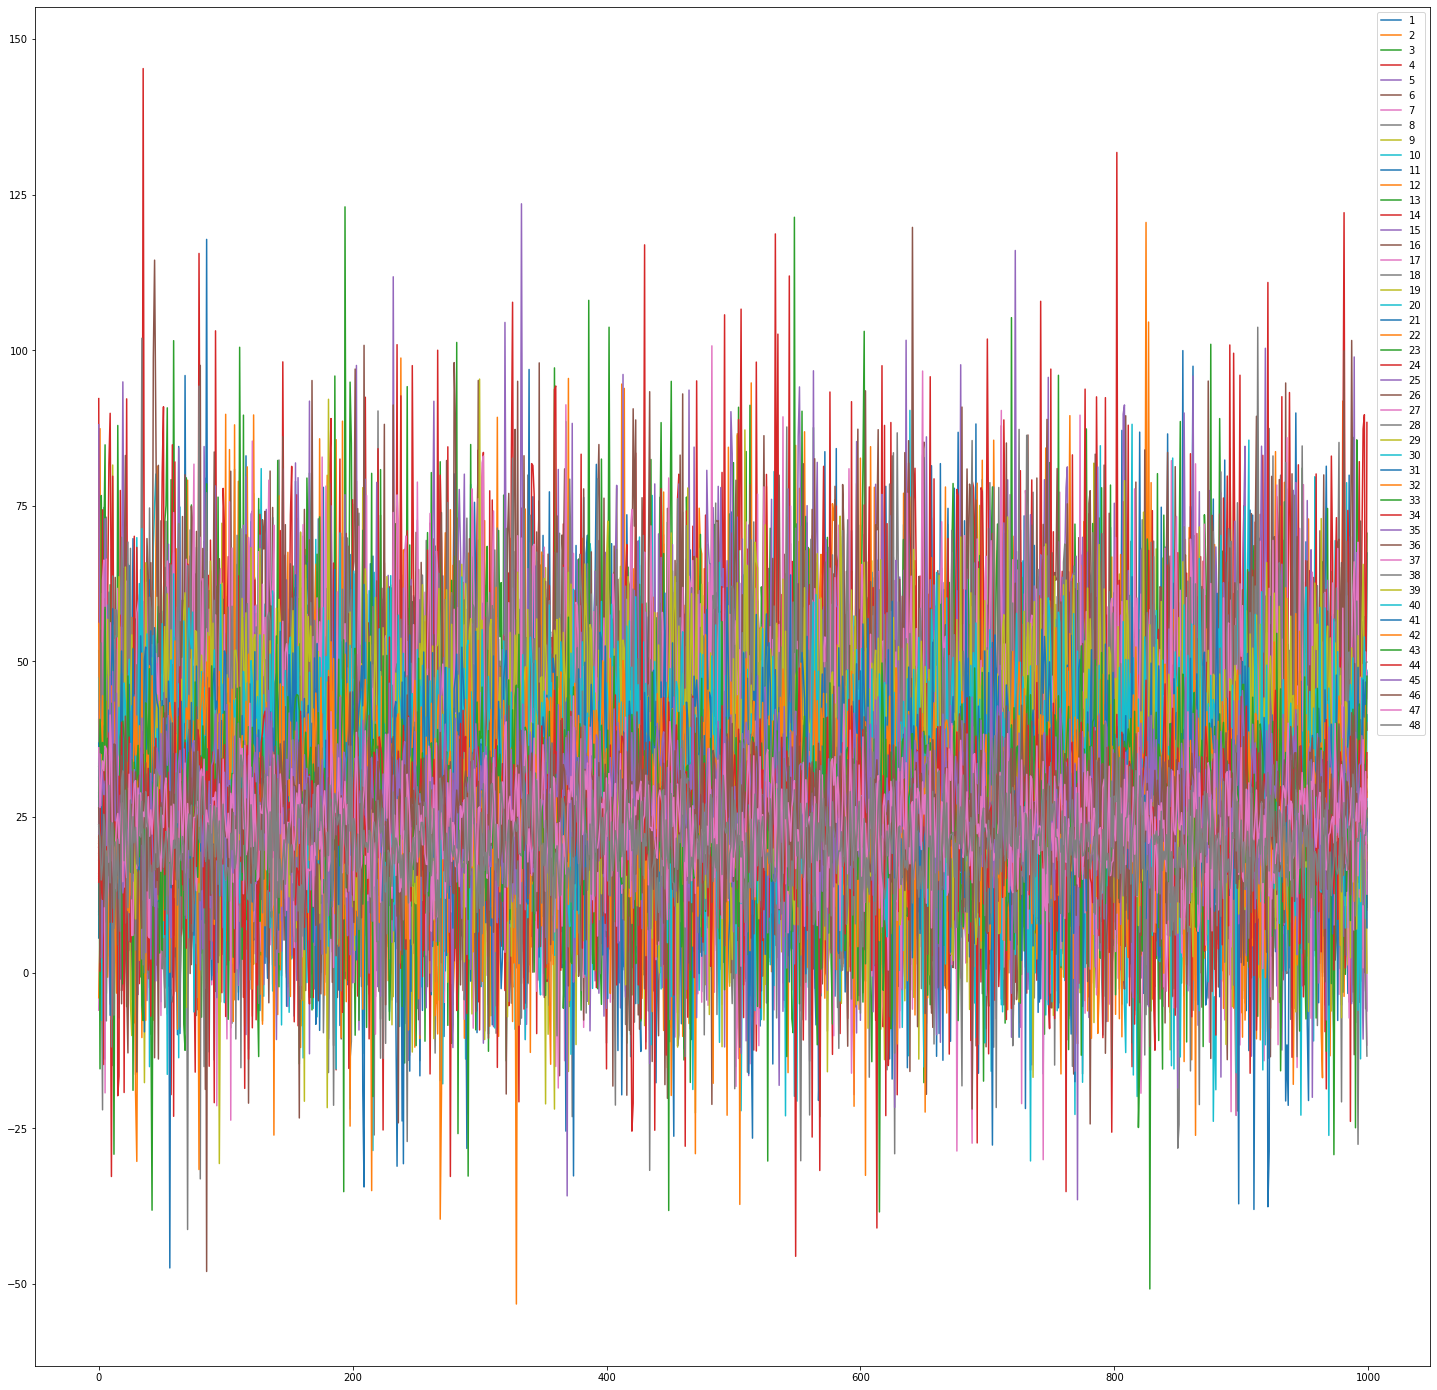

In [75]:
df_simulationResult.append(simulationResult, ignore_index=True).plot.line(figsize=(25,25))

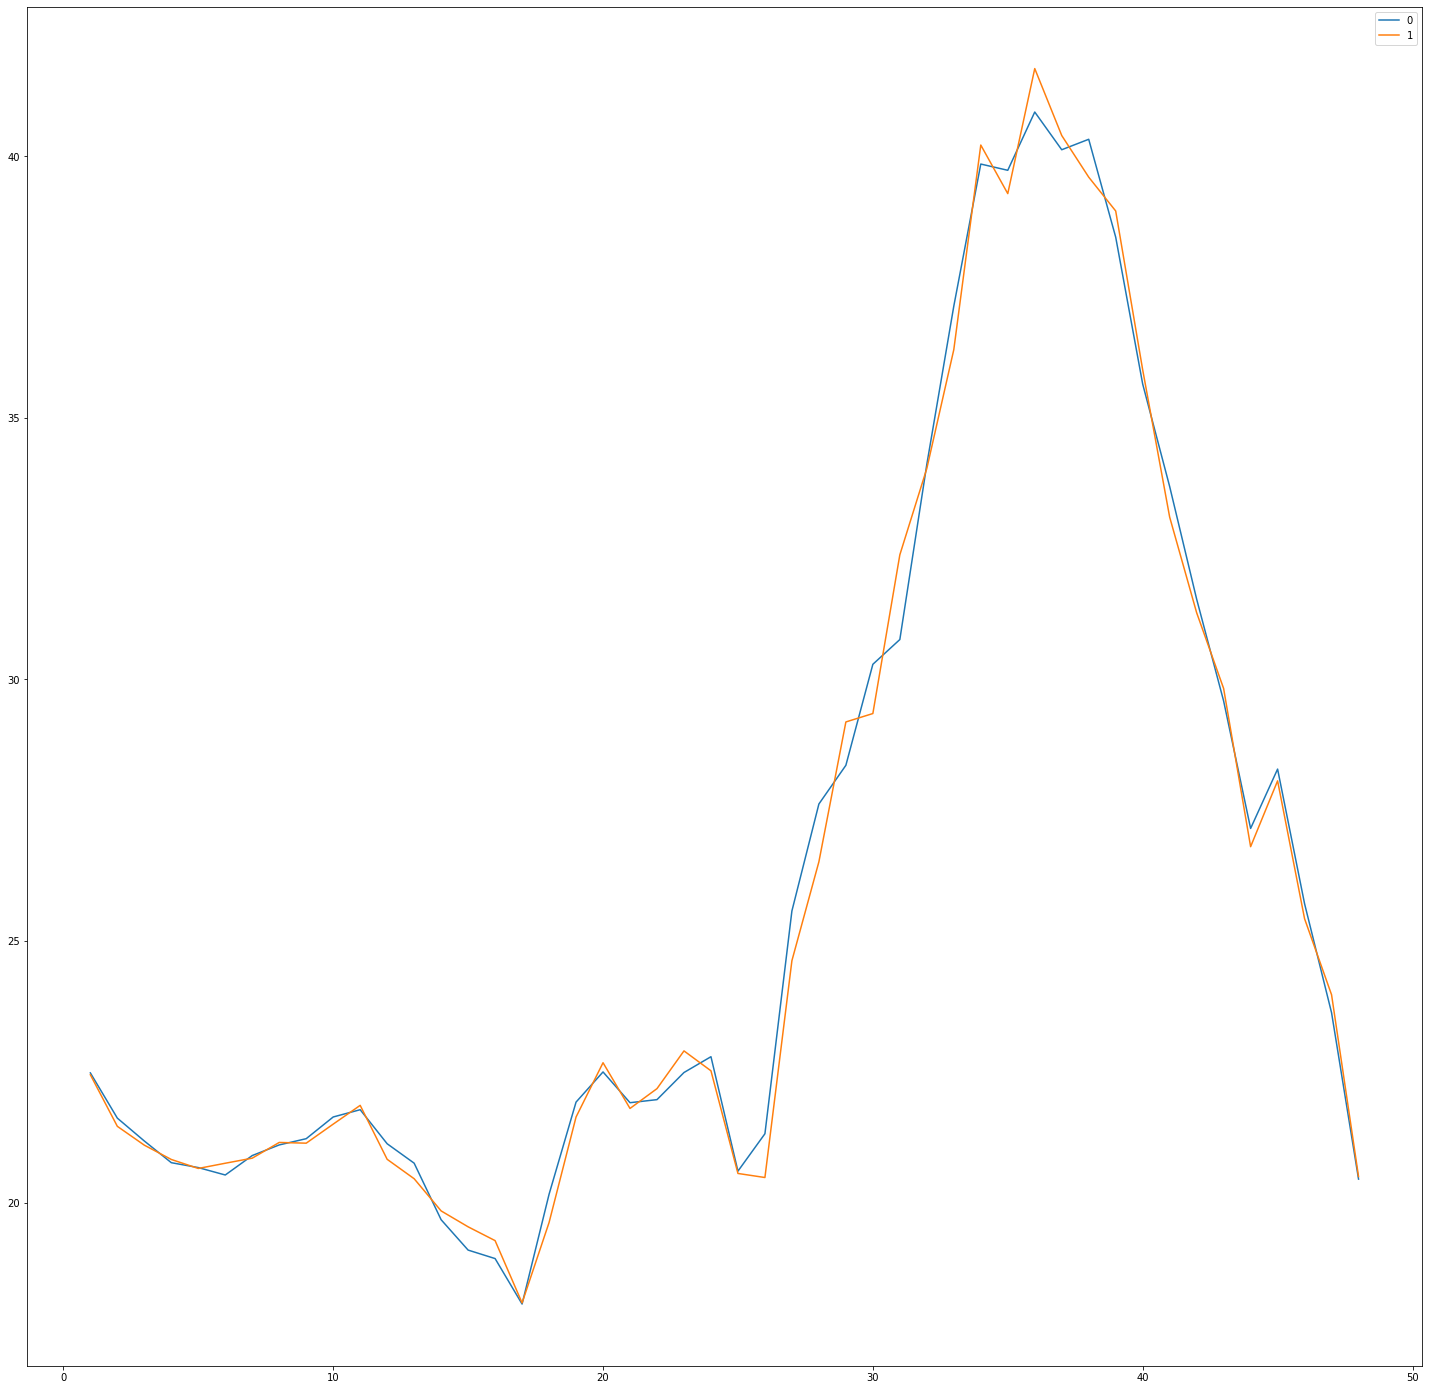

In [76]:
pd.DataFrame(
        columns=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
            ).append(
                df.pivot(index='年月日', columns='時刻コード')['エリアプライス東京(円/kWh)'].describe().loc[['mean']]
            ).append(
                df_simulationResult.append(simulationResult, ignore_index=True).describe().loc[['mean']]
            ).reset_index(drop=True).T.plot.line(figsize=(25,25))